# 3.3 Word Embeddings

## Attribution
This notebook was re-used and modified from material created by NVIDIA and Dartmouth College and licensed under the Creative Commons Attribution-Non Commercial 4.0 International License (CC BY-NC 4.0) for the **Generative AI: Theory and Applications** MSc Module at UWS.
Source materials available at: https://developer.nvidia.com/gen-ai-teaching-kit-syllabus (NVIDIA Deep Learning Institute Generative AI Teaching Kit) 

## Overview
Welcome to the third notebook in this week. In this notebook, we will look at Word Embeddings. 

In [1]:
# Required Libraries
# PLEASE UNCOMMENT AND RUN THE FOLLOWING LINE IF YOU ARE USING A COLAB NOTEBOOK
# !pip install -qqq scikit-learn gensim transformers torch matplotlib

In [2]:
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.kernel.restart();'))

<IPython.core.display.Javascript object>

## 1. TF-IDF to Compare Documents

What is TF-IDF?
- TF-IDF stands for Term Frequency-Inverse Document Frequency.
- It is a numerical statistic that represents the importance of a word in a document relative to a collection of documents (corpus).

Why Use TF-IDF?
- It highlights unique or important terms in a document by penalizing frequently occurring common terms across the corpus.
- Useful for comparing documents and identifying similarities based on content.

What This Section Covers:
1. Compute TF-IDF vectors for a small set of documents.
2. Compare document vectors using cosine similarity.

Applications:
- Document clustering and classification.
- Search engines for ranking results based on query-document similarity.

Tools:
- **Scikit-learn**: Provides easy-to-use methods for calculating TF-IDF and cosine similarity.

=== Expanded TF-IDF Example ===

TF-IDF Features (Vocabulary): ['about' 'ai' 'be' 'can' 'deep' 'field' 'for' 'in' 'is' 'language'
 'learning' 'machine' 'natural' 'nlp' 'of' 'processing' 'significant'
 'subset' 'tasks' 'used']


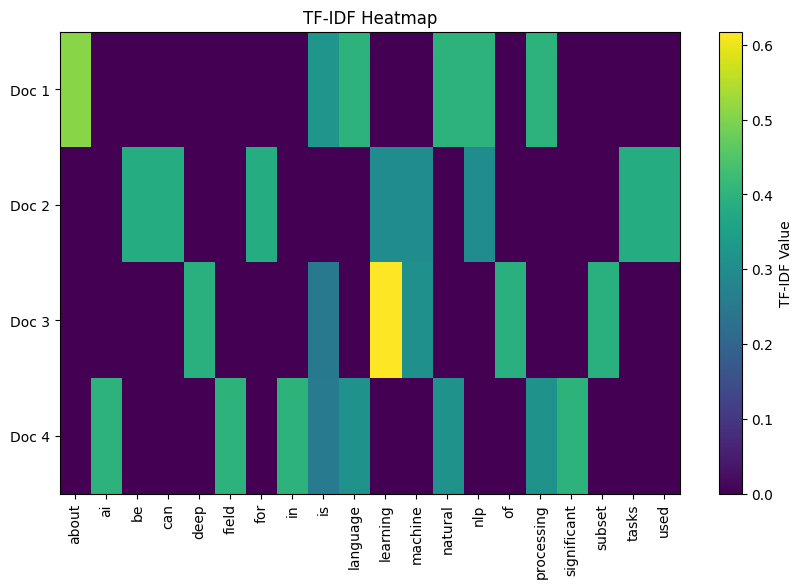


Pairwise TF-IDF Cosine Similarity Matrix:
[[1.         0.12022835 0.08088661 0.45977889]
 [0.12022835 1.         0.27883303 0.        ]
 [0.08088661 0.27883303 1.         0.06373131]
 [0.45977889 0.         0.06373131 1.        ]]

Updated Similarity Matrix (After Adding New Document):
[[1.         0.08798224 0.08829179 0.49746895 0.09255788]
 [0.08798224 1.         0.29029903 0.         0.06989854]
 [0.08829179 0.29029903 1.         0.07041776 0.        ]
 [0.49746895 0.         0.07041776 1.         0.10713331]
 [0.09255788 0.06989854 0.         0.10713331 1.        ]]


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

# === TF-IDF Expanded Example ===
print("=== Expanded TF-IDF Example ===")

# Step 1: Define a small set of documents
documents = [
    "NLP is about processing natural language.",
    "Machine learning can be used for NLP tasks.",
    "Deep learning is a subset of machine learning.",
    "Natural language processing is a significant field in AI."
]

# Step 2: Calculate TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Step 3: Explore TF-IDF values for individual terms
feature_names = vectorizer.get_feature_names_out()
print("\nTF-IDF Features (Vocabulary):", feature_names)

# Convert the matrix to dense format for easier visualization
tfidf_dense = tfidf_matrix.todense()

# Visualize the TF-IDF values as a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(tfidf_dense, aspect="auto", cmap="viridis")
plt.colorbar(label="TF-IDF Value")
plt.xticks(ticks=np.arange(len(feature_names)), labels=feature_names, rotation=90)
plt.yticks(ticks=np.arange(len(documents)), labels=[f"Doc {i+1}" for i in range(len(documents))])
plt.title("TF-IDF Heatmap")
plt.show()

# Step 4: Compare documents using cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
print("\nPairwise TF-IDF Cosine Similarity Matrix:")
print(similarity_matrix)

# Step 5: Experiment: Modify the corpus and observe changes
new_document = "NLP and AI are closely related fields."
documents.append(new_document)
updated_tfidf_matrix = vectorizer.fit_transform(documents)
updated_similarity_matrix = cosine_similarity(updated_tfidf_matrix)

print("\nUpdated Similarity Matrix (After Adding New Document):")
print(updated_similarity_matrix)

---

## 2. Word2Vec Exploration

What is Word2Vec?
- Word2Vec is a predictive embedding model that learns vector representations for words.
- These embeddings capture semantic relationships between words based on their contexts.

Why Use Word2Vec?
- It generates dense, low-dimensional vector representations for words.
- Captures semantic similarity, enabling comparisons like: "king - man + woman ≈ queen."

What This Section Covers:
1. Train a Word2Vec model on a small corpus.
2. Explore semantic similarity and relationships between words.

Applications:
- Semantic similarity and analogy tasks.
- Text clustering and classification.
- Pretrained embeddings for NLP models.

Tools:
- **Gensim**: A library for unsupervised topic modeling and natural language processing.

In [4]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# === Expanded Word2Vec Example ===
print("=== Expanded Word2Vec Example ===")

# Step 1: Define a corpus for training
corpus = [
    "I love machine learning and NLP".split(),
    "NLP is about processing language".split(),
    "Word embeddings are powerful representations".split(),
    "Machine learning powers many NLP systems".split()
]

# Step 2: Train a Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=50, window=3, min_count=1, sg=0, epochs=10)

# Step 3: Analyze word similarities
similarity = model.wv.similarity("NLP", "machine")
print(f"Similarity between 'NLP' and 'machine': {similarity:.4f}")

# Find words most similar to "NLP"
most_similar = model.wv.most_similar("NLP")
print("Words most similar to 'NLP':", most_similar)

# Step 4: Visualize word embeddings using PCA
word_vectors = model.wv.vectors
word_labels = model.wv.index_to_key

# Reduce dimensionality
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plot embeddings
plt.figure(figsize=(10, 8))
for word, vec in zip(word_labels, reduced_vectors):
    plt.scatter(vec[0], vec[1])
    plt.text(vec[0] + 0.02, vec[1] + 0.02, word, fontsize=9)
plt.title("Word2Vec Embeddings Visualization")
plt.show()

# Step 5: Experiment: Change vector size and observe effects
print("\nExperiment: Re-train with a different vector size.")
small_model = Word2Vec(sentences=corpus, vector_size=10, min_count=1, epochs=10)
print("Vocabulary size:", len(small_model.wv.index_to_key))

ImportError: cannot import name 'triu' from 'scipy.linalg' (/Users/willzwayn/Developer/GenAI-Applications/.venv/lib/python3.12/site-packages/scipy/linalg/__init__.py)

---

## 3. BERT Embeddings

What is BERT?
- BERT (Bidirectional Encoder Representations from Transformers) is a pretrained transformer model for generating contextual embeddings.
- Unlike static embeddings (e.g., Word2Vec), BERT embeddings depend on the context of the surrounding words.

Why Use BERT Embeddings?
- Captures polysemy: Words with the same spelling but different meanings get distinct embeddings based on context.
- Provides sentence embeddings by aggregating token-level embeddings.

What This Section Covers:
1. Use a pretrained BERT model to generate embeddings for a sentence.
2. Explore how the embeddings represent the sentence as a vector.

Applications:
- Sentence similarity and text classification.
- Transfer learning for downstream NLP tasks.

Tools:
- **Transformers Library**: Hugging Face’s library for pretrained transformer models.
- **PyTorch**: For model inference.

In [5]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# === Expanded BERT Embeddings Example ===
print("=== Expanded BERT Embeddings Example ===")

# Step 1: Load a pretrained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Define sentences for comparison
sentences = [
    "Transformers are revolutionizing NLP.",
    "BERT embeddings capture context.",
    "Natural language processing is evolving."
]

# Step 2: Generate embeddings for each sentence
embeddings = []
for sentence in sentences:
    inputs = tokenizer(sentence, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        last_hidden_state = outputs.last_hidden_state
        sentence_embedding = torch.mean(last_hidden_state, dim=1).squeeze()
        embeddings.append(sentence_embedding.numpy())

# Step 3: Compare embeddings (Cosine similarity)
similarities = cosine_similarity(embeddings)
print("Cosine Similarity Matrix for Sentences:")
print(similarities)

# Step 4: Visualize embeddings using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
for i, label in enumerate(sentences):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0] + 0.02, reduced_embeddings[i, 1] + 0.02, label, fontsize=9)
plt.title("BERT Sentence Embeddings Visualization")
plt.show()

/Users/willzwayn/Developer/GenAI-Applications/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


=== Expanded BERT Embeddings Example ===


Cancellation requested; stopping current tasks.


KeyboardInterrupt: 